In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

<h4>File reading and merging</h4>

In [2]:
df1 = pd.read_csv('7282_1.csv')
df2 = pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv')
df3 = pd.read_csv('Datafiniti_Hotel_Reviews.csv')

In [3]:
df = pd.concat([df1, df2, df3])

In [4]:
old_names = ['reviews.date', 'reviews.rating', 'reviews.title', 'reviews.text', 'reviews.userCity', 
             'reviews.username', 'reviews.userProvince'] 
new_names = ['date', 'rating', 'title', 'text', 'userCity', 'username', 'userProvince']
df.rename(columns = dict(zip(old_names, new_names)), inplace = True)
df

,address,categories,city,country,latitude,longitude,name,postalCode,province,date,...,userProvince,id,dateAdded,dateUpdated,primaryCategories,keys,reviews.dateSeen,reviews.sourceURLs,sourceURLs,websites
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,215 S Pacific St,"Hotel,Hotels,Lodging,Motels",Rockaway Beach,US,45.611260,-123.945560,Silver Sands Oceanfront Motel,97136-9596,OR,2016-03-13T00:00:00Z,...,GA,AVwd4TMv_7pvs4fz-Ers,2016-03-24T11:44:15Z,2018-01-01T00:00:46Z,Accommodation & Food Services,us/or/rockawaybeach/215spacificst/-1035432852,2016-03-23T00:00:00Z,http://www.tripadvisor.com/Hotel_Review-g52043...,https://www.tripadvisor.com/Hotel_Review-g5204...,http://www.oregonsilversands.com
9996,669 Route 6a,"Hotel,Hotels",East Sandwich,US,41.729390,-70.399250,Sandy Neck Motel,02537-1472,MA,2015-12-11T00:00:00Z,...,MA,AVwdRp4DIN2L1WUfuGZZ,2015-10-26T23:03:02Z,2018-01-01T00:00:44Z,Accommodation & Food Services,us/ma/eastsandwich/669route6a/-1480952475,"2016-05-13T00:00:00Z,2016-03-21T00:00:00Z",https://www.tripadvisor.com/Hotel_Review-g4154...,https://www.tripadvisor.com/Hotel_Review-g4154...,http://www.sandyneck.com
9997,702 W Appleway Ave,"Hotel,Hotel, Motel, and Building,Hotels,Lodgin...",Coeur d'Alene,US,47.699930,-116.796900,Shilo Inn Suites - Coeur d'Alene,83814-9338,ID,2017-11-17T00:00:00.000Z,...,UnitedStates,AVwd1TbkByjofQCxs6FH,2016-06-11T03:12:23Z,2018-01-01T00:00:44Z,Accommodation & Food Services,us/id/coeurd'alene/702wapplewayave/210547670,2017-12-17T00:00:00Z,https://www.tripadvisor.com/Hotel_Review-g3541...,https://www.tripadvisor.com/Hotel_Review-g3541...,http://www.shiloinns.com
9998,2295 N Highland Ave,"Hotel,Hotels Motels,Budget Hotels,Hotels & Motels",Jackson,US,35.666390,-88.830120,Scottish Inn,38305-4922,TN,2016-06-09T00:00:00Z,...,NaN,AVwdHbizIN2L1WUfsXto,2016-12-13T03:44:36Z,2018-01-01T00:00:43Z,Accommodation & Food Services,us/tn/jackson/2295nhighlandave/1759289930,2016-07-16T00:00:00Z,https://www.tripadvisor.com/Hotel_Review-g5512...,https://www.tripadvisor.com/Hotel_Review-g5512...,http://api.citygridmedia.com/content/places/v2...


<h4>Combine all reviews for each hotel</h4>

In [5]:
reviews = dict()
for i in range(len(df)):
    if df['name'].iloc[i] in reviews:
        reviews[df['name'].iloc[i]] = reviews[df['name'].iloc[i]] + str(df['text'].iloc[i])
    else: 
        reviews[df['name'].iloc[i]] = str(df['text'].iloc[i])

# LDA: Latent Dirichlet Allocation Model

<li>Import all necessary libraries
<li>Review document preparation
<li>Cleaning the data
<li>Building and running the model
<li>Result display and interpretation

<h3>Importing necessary libraries </h3>

In [6]:
import nltk
#from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem.porter import PorterStemmer
import pprint

<h3>Data preparation and cleaning</h3>

<li>Prepare a list of reviews for each hotel

In [7]:
review_list =list()
for item in reviews.values():    
    review_list.append(item)

<li>Data cleaning and preparation 

In [8]:
for i in range(len(review_list)):
    review = review_list[i]
    sents = sent_tokenize(review)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    review_list[i] = '. '.join(sents)

<li>Stemming

In [9]:
p_stemmer = PorterStemmer()
for review in review_list[:-1]:
    words = word_tokenize(review)
    review_list[i] =  nltk.Text([p_stemmer.stem(i).lower() for i in words])

<li>More cleaning

In [10]:
no_list = ['la', 'en', 'y', 'et', 'le', 'que', 'el', 'e', 'und', 'es', 'stay', 'stayed','staying','san', 'est', 'muy', 'trs', 'les', 'die', 'las', 'il', 'das', 'para']
texts = [[word for word in review.lower().split()
        if word not in STOPWORDS and word.isalnum() and word not in no_list and not word.lower() == 'hotel']
        for review in review_list[:-1]]

<h3>Building and implementing the model</h3>

In [11]:
def lda_modeling(texts,num_topics=3,passes=20):
    #Building a model
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    #Implementing the model
    lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)
    return lda,corpus,dictionary

In [12]:
lda,corpus,dictionary =lda_modeling(texts)

<h3>Results Interpretation</h3>

<li>Candidate topics in the form of words

In [13]:
pp = pprint.PrettyPrinter(indent=5)
pp.pprint(lda.print_topics(num_words=20))

[    (    0,
          '0.025*"room" + 0.007*"like" + 0.007*"place" + 0.005*"good" + '
          '0.005*"bed" + 0.005*"rooms" + 0.005*"night" + 0.005*"desk" + '
          '0.004*"staff" + 0.004*"door" + 0.004*"bathroom" + 0.004*"clean" + '
          '0.004*"got" + 0.003*"shower" + 0.003*"old" + 0.003*"dirty" + '
          '0.003*"nice" + 0.003*"2" + 0.003*"check" + 0.003*"motel"'),
     (    1,
          '0.014*"room" + 0.013*"great" + 0.011*"staff" + 0.009*"time" + '
          '0.007*"thank" + 0.006*"service" + 0.006*"location" + 0.006*"rooms" '
          '+ 0.006*"hope" + 0.006*"enjoyed" + 0.005*"like" + 0.005*"nice" + '
          '0.005*"good" + 0.004*"experience" + 0.004*"hear" + 0.004*"taking" + '
          '0.004*"new" + 0.004*"best" + 0.004*"view" + 0.004*"look"'),
     (    2,
          '0.030*"room" + 0.018*"staff" + 0.017*"breakfast" + 0.013*"great" + '
          '0.013*"nice" + 0.013*"clean" + 0.011*"good" + 0.009*"rooms" + '
          '0.008*"friendly" + 0.007*"desk" + 0.00

<li>Wordcloud for the topics

In [14]:
def draw_wordcloud(lda,num_topics,min_size=0,STOPWORDS=[],max_words=20):
    
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
        
    COL_NUM = 3
    ROW_NUM = 1
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

    
    for i in range(num_topics):
        word_list=[]
        prob_total = 0
        for word,prob in lda.show_topic(i,topn=50):
            prob_total +=prob
        for word,prob in lda.show_topic(i,topn=50):
            if word in STOPWORDS or  len(word) < min_size:
                continue
    #         freq = int(prob/prob_total*1000)
            freq = int(prob/prob_total*100)
            alist=[word]
            word_list.extend(alist*freq)
        
        shuffle(word_list)
        text = ' '.join(word_list)

        ax = axes[i] 
        ax.set_title(lda.show_topics()[i][0])
        wordcloud = WordCloud(stopwords = STOPWORDS,background_color='white',height = 1000, width =1200,max_words=max_words).generate(text)
        ax.imshow(wordcloud)
        ax.axis('off') 
        

    return None

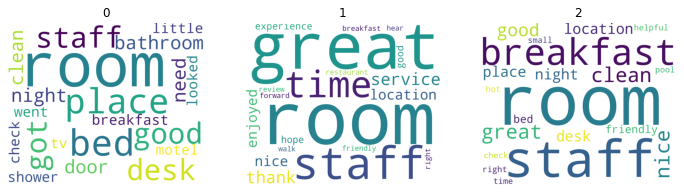

In [15]:
draw_wordcloud(lda,3)

<li>Intertopic Distance Map (via multidimensional scaling)

In [16]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

<h3>Summary on the results</h3>

<p>There are three types of reviews showing interests in different areas</p>

<li> Location : Views, beauty, scenes
<li> Service : Friendly, appreciation, time, experience
<li> Facilities: Rooms, cleanliness, breakfast